### Comparar ajustes pequeños en el resultado de las figuras de mérito

Partiendo de un resultado optimo de FM basado en la instancia anterior (del algo genético), se realizan pequeñas mutaciones para encontrar el mínimo FM posible.

In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from room.geometry_generator import calculation_of_geometry
from mesh.mesh_3D_complex import create_complex_mesh
from FEM.FEM_source import FEM_Source_Solver_Average
from aux.merit_figure import merit_magnitude_deviation, merit_spatial_deviation
from plots.graph_room_outline import plot_room_outline

/home/diber/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
Lx = 250       # Largo de la sala en X 
Ly = 300       # Largo de la sala en Y
Lz = 220       # Alto de la sala
Dx = 50        # Delta X
Dy = 80        # Delta Y
Dz = 10        # Delta Z

# Posiciones fuente y receptor (en metros)
source_position = (1.9, 1.0, 1.3)
receptor_position = (1.25, 1.9, 1.2)

In [13]:
def calculate_response(room, height, sp, rp):
    mesh1 = "room_mesh_complex1"  # Crear malla con el script correspondiente
    mesh2 = "room_mesh_complex2"  # Crear malla con el script correspondiente
    mesh3 = "room_mesh_complex3"  # Crear malla con el script correspondiente

    create_complex_mesh(room, height, sp, 80, mesh1)
    create_complex_mesh(room, height, sp, 140, mesh2)
    create_complex_mesh(room, height, sp, 200, mesh3)

    # Evalua la rta en frecuencia para esa sala
    res_freq = 0.1
    f1 = np.arange(20, 80, res_freq)
    res1 = FEM_Source_Solver_Average(f1, f'mallado/{mesh1}.msh', rp)

    f2 = np.arange(80, 140, res_freq)
    res2 = FEM_Source_Solver_Average(f2, f'mallado/{mesh2}.msh', rp)

    f3 = np.arange(140, 200, res_freq)
    res3 = FEM_Source_Solver_Average(f3, f'mallado/{mesh3}.msh', rp)

    res_tot = np.hstack([res1, res2, res3])
    res_tot_prom = np.sum(res_tot, axis=0) / 7

    # Calcula figuras de mérito
    sv_merit = merit_spatial_deviation(res_tot)
    md_merit = merit_magnitude_deviation(res_tot)
    merit_tot = sv_merit + md_merit
    
    return merit_tot, md_merit, sv_merit, res_tot_prom


In [14]:
room_1 =np.array([     [0.625     , 0.        ],
                       [0.12      , 0.33      ],
                       [0.55      , 2.53      ],
                       [0.19      , 3.        ],
                       [2.31      , 3.        ],
                       [1.95      , 2.53      ],
                       [2.38      , 0.33      ],
                       [1.875     , 0.        ]])
Z1 = 2.2

FM, MD, SD, mag1 = calculate_response(room_1, Z1, source_position, receptor_position)
print(f"Mérito total: {FM} | MD: {MD} | SV: {SD}")

Info    : Reading 'mallado/room_mesh_complex1.msh'...
Info    : 57 entities
Info    : 645 nodes
Info    : 3513 elements
Info    : Done reading 'mallado/room_mesh_complex1.msh'
Info    : Reading 'mallado/room_mesh_complex2.msh'...
Info    : 57 entities
Info    : 1454 nodes
Info    : 8007 elements
Info    : Done reading 'mallado/room_mesh_complex2.msh'
Info    : Reading 'mallado/room_mesh_complex3.msh'...
Info    : 57 entities
Info    : 4449 nodes
Info    : 25894 elements
Info    : Done reading 'mallado/room_mesh_complex3.msh'
Mérito total: 17.89945079652106 | MD: 13.76308441792307 | SV: 4.136366378597988


In [15]:
room_1 =np.array([     [0.625     , 0.        ],
                       [0.12      , 0.33      ],
                       [0.55      , 2.53      ],
                       [0.19      , 3.        ],
                       [2.31      , 3.        ],
                       [1.95      , 2.53      ],
                       [2.38      , 0.33      ],
                       [1.875     , 0.        ]])
Z2 = 2.1

FM, MD, SD, mag2 = calculate_response(room_1, Z2, source_position, receptor_position)
print(f"Mérito total: {FM} | MD: {MD} | SV: {SD}")

Info    : Reading 'mallado/room_mesh_complex1.msh'...
Info    : 57 entities
Info    : 541 nodes
Info    : 2890 elements
Info    : Done reading 'mallado/room_mesh_complex1.msh'
Info    : Reading 'mallado/room_mesh_complex2.msh'...
Info    : 57 entities
Info    : 1401 nodes
Info    : 7674 elements
Info    : Done reading 'mallado/room_mesh_complex2.msh'
Info    : Reading 'mallado/room_mesh_complex3.msh'...
Info    : 57 entities
Info    : 4026 nodes
Info    : 23271 elements
Info    : Done reading 'mallado/room_mesh_complex3.msh'
Mérito total: 14.183418153310933 | MD: 10.859830222356413 | SV: 3.32358793095452


Le agrego precisión arbitraria a los puntos

In [16]:
room_1 =np.array([     [0.62     , 0.        ],
                       [0.123      , 0.333      ],
                       [0.554      , 2.534      ],
                       [0.192      , 3.        ],
                       [2.314      , 3.        ],
                       [1.953      , 2.534      ],
                       [2.382      , 0.333      ],
                       [1.876     , 0.        ]])
Z3 = 2.1

FM, MD, SD, mag3 = calculate_response(room_1, Z3, source_position, receptor_position)
print(f"Mérito total: {FM} | MD: {MD} | SV: {SD}")


Info    : Reading 'mallado/room_mesh_complex1.msh'...
Info    : 57 entities
Info    : 544 nodes
Info    : 2923 elements
Info    : Done reading 'mallado/room_mesh_complex1.msh'
Info    : Reading 'mallado/room_mesh_complex2.msh'...
Info    : 57 entities
Info    : 1411 nodes
Info    : 7755 elements
Info    : Done reading 'mallado/room_mesh_complex2.msh'
Info    : Reading 'mallado/room_mesh_complex3.msh'...
Info    : 57 entities
Info    : 3971 nodes
Info    : 22947 elements
Info    : Done reading 'mallado/room_mesh_complex3.msh'
Mérito total: 14.022408911933752 | MD: 10.67615175308056 | SV: 3.3462571588531906


In [17]:
room_base = [(0, 0), (0, 3), (2.5, 3), (2.5, 0)]
Z3 = 2.1

FM, MD, SD, mag4 = calculate_response(room_base, Z3, source_position, receptor_position)
print(f"Mérito total: {FM} | MD: {MD} | SV: {SD}")

Info    : Reading 'mallado/room_mesh_complex1.msh'...
Info    : 33 entities
Info    : 627 nodes
Info    : 3461 elements
Info    : Done reading 'mallado/room_mesh_complex1.msh'
Info    : Reading 'mallado/room_mesh_complex2.msh'...
Info    : 33 entities
Info    : 1760 nodes
Info    : 9910 elements
Info    : Done reading 'mallado/room_mesh_complex2.msh'
Info    : Reading 'mallado/room_mesh_complex3.msh'...
Info    : 33 entities
Info    : 5529 nodes
Info    : 32511 elements
Info    : Done reading 'mallado/room_mesh_complex3.msh'
Mérito total: 15.987959986895852 | MD: 12.206127466484793 | SV: 3.7818325204110605


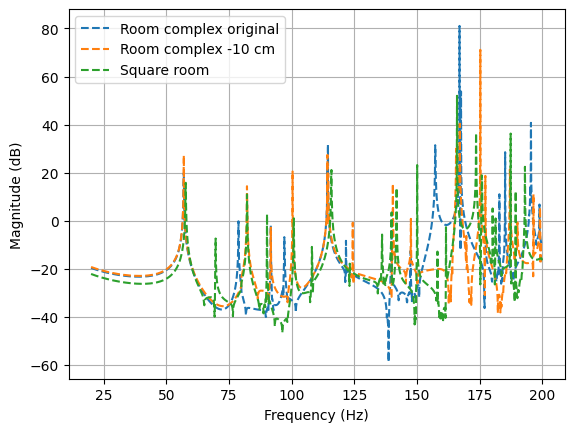

In [18]:
res_freq = 0.1
f1 = np.arange(20, 80, res_freq)
f2 = np.arange(80, 140, res_freq)
f3 = np.arange(140, 200, res_freq)
f_tot =  np.hstack([f1, f2, f3])

plt.figure("Resultado magnitud")
plt.plot(f_tot, mag1, '--', label= "Room complex original")
plt.plot(f_tot, mag2, '--', label= "Room complex -10 cm")
# plt.plot(f_tot, mag3, '--', label= "Optimal small variations")
plt.plot(f_tot, mag4, '--', label= "Square room")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()


Los resultados de este notebook son con res=1Hz, antes lo había probado con res=2Hz y cambia (de 12 dB el FM mas bajo a 13 dB), pero la relación entre los diferentes casos de mantiene